In [19]:
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
from gensim import matutils, models
import scipy.sparse
import string
from collections import Counter
import pyLDAvis.gensim
from gensim import corpora, models, similarities
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

# Inception

In [20]:
#read in Inception csv
Inception = pd.read_csv('Inception.csv')
Inception.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215


## Latent Dirichlet Allocation

Latent Dirichlet Allocation is used to break down movie topics from tweets. 

In [21]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in Inception['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [22]:
#creating a stop words list - these words don't add much value

additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += additional_stopwords

# print(stopwords_list)

In [23]:
# isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)
# tweets

In [24]:
#stemmed tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [25]:
#add columns into Inception dataframe

#stemmed tweets list
Inception['stemmed'] = stemmed_tweets

#stemmed tweets string
stemmed_tweets_lst = []
for tweet in Inception['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

Inception['string_stemmed'] = stemmed_tweets_lst

Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[understand, incept, movi]",understand incept movi
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[incept, pant, improvefilmtitlesbyaddinginmyp]",incept pant improvefilmtitlesbyaddinginmyp
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[imnot, dafath, greathighmovi, incept]",imnot dafath greathighmovi incept
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000,"[never, saw, incept]",never saw incept
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215,"[jck49erfan, cornholio3000, incept, one, leo, ...",jck49erfan cornholio3000 incept one leo patien...


The row numbers represent each tweet and the columns represent every stemmed word tweeted about inception.

In [26]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Inception['string_stemmed'].tolist())

# list of words
# vec.get_feature_names()

In [27]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df.shape)
df.head()

(5100, 6420)


,000,00a,00pm,02,03zutlg,04gb,07,090,0cdefc1,0dizzl,...,zooeyglass,zookeep,zoveel,zpdfj,zpxw4,zuckerberg,zumba,zvkyj,zw3yz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Inception['stemmed'])
type(dictionary)
len(dictionary)

6461

In [29]:
#bag of words (tokenid, tokencount)
corpus = [dictionary.doc2bow(d) for d in Inception['stemmed']]
# corpus

In [30]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.118*"incept" + 0.023*"dream" + 0.020*"movi" + 0.019*"like" + 0.013*"time" + 0.013*"watch" + 0.007*"first" + 0.006*"love" + 0.006*"gonna" + 0.006*"think"'),
 (1,
  '0.067*"incept" + 0.009*"dream" + 0.007*"lol" + 0.006*"dreamin" + 0.005*"watch" + 0.004*"need" + 0.004*"make" + 0.003*"sinc" + 0.003*"call" + 0.003*"gotta"'),
 (2,
  '0.053*"incept" + 0.011*"like" + 0.008*"bit" + 0.007*"island" + 0.007*"movi" + 0.006*"sinc" + 0.006*"shutter" + 0.005*"much" + 0.005*"come" + 0.004*"tire"'),
 (3,
  '0.117*"incept" + 0.052*"watch" + 0.016*"dream" + 0.014*"movi" + 0.010*"good" + 0.007*"go" + 0.006*"lol" + 0.005*"like" + 0.005*"time" + 0.005*"night"'),
 (4,
  '0.234*"pant" + 0.232*"incept" + 0.171*"improvefilmtitlesbyaddinginmyp" + 0.006*"improvemovietitlesbyaddinginmyp" + 0.004*"inmyp" + 0.004*"lol" + 0.002*"gt" + 0.002*"afn" + 0.002*"improvingfilmtitlesbyaddinginmyp" + 0.001*"improvefilmtitlebyaddinginmyp"')]

In [31]:
#clarifying LDA model
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.118*"incept" + 0.023*"dream" + 0.020*"movi" + 0.019*"like" + 0.013*"time" + 0.013*"watch" + 0.007*"first" + 0.006*"love" + 0.006*"gonna" + 0.006*"think"
Topic 1 
Words: 0.067*"incept" + 0.009*"dream" + 0.007*"lol" + 0.006*"dreamin" + 0.005*"watch" + 0.004*"need" + 0.004*"make" + 0.003*"sinc" + 0.003*"call" + 0.003*"gotta"
Topic 2 
Words: 0.053*"incept" + 0.011*"like" + 0.008*"bit" + 0.007*"island" + 0.007*"movi" + 0.006*"sinc" + 0.006*"shutter" + 0.005*"much" + 0.005*"come" + 0.004*"tire"
Topic 3 
Words: 0.117*"incept" + 0.052*"watch" + 0.016*"dream" + 0.014*"movi" + 0.010*"good" + 0.007*"go" + 0.006*"lol" + 0.005*"like" + 0.005*"time" + 0.005*"night"
Topic 4 
Words: 0.234*"pant" + 0.232*"incept" + 0.171*"improvefilmtitlesbyaddinginmyp" + 0.006*"improvemovietitlesbyaddinginmyp" + 0.004*"inmyp" + 0.004*"lol" + 0.002*"gt" + 0.002*"afn" + 0.002*"improvingfilmtitlesbyaddinginmyp" + 0.001*"improvefilmtitlebyaddinginmyp"


In [32]:
# Display model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# vis
# pyLDAvis.save_html(vis, 'images/lda_inception.html')

## T-SNE

In [37]:
print(range(len(corpus)))
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
X

range(0, 5100)


[[0.7973825, 0.05031091, 0.050379343, 0.050909873, 0.051017392],
 [0.05024733, 0.050140757, 0.050108295, 0.050243888, 0.7992597],
 [0.04034006, 0.04022681, 0.040196747, 0.8385718, 0.040664576],
 [0.05196599, 0.05031743, 0.050339602, 0.7962724, 0.051104557],
 [0.016910356, 0.016987009, 0.016703784, 0.93263614, 0.016762715],
 [0.37017328, 0.040661205, 0.040218085, 0.040684253, 0.5082632],
 [0.8374836, 0.040634755, 0.04023221, 0.040716007, 0.04093343],
 [0.034142107, 0.8642281, 0.033597343, 0.03398821, 0.034044217],
 [0.0343524, 0.033492334, 0.035194177, 0.8632358, 0.03372536],
 [0.83617884, 0.040506102, 0.040910665, 0.04099995, 0.041404467],
 [0.58504933, 0.016821738, 0.01684026, 0.3645166, 0.01677212],
 [0.05024774, 0.05014079, 0.050108302, 0.05024381, 0.79925936],
 [0.8383716, 0.04025408, 0.040186204, 0.04051251, 0.040675588],
 [0.72802585, 0.06724492, 0.06771534, 0.068033114, 0.0689808],
 [0.898654, 0.025350519, 0.025173916, 0.025505206, 0.02531639],
 [0.9191206, 0.020145316, 0.020279

In [38]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

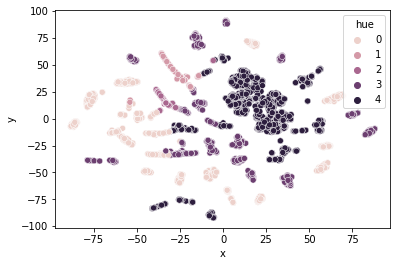

In [39]:
# plot of reduced dimensionality for Inception
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Ingrid Goes West

## LDA 

In [40]:
#read in Ingrid Goes West csv
IngridGoesWest = pd.read_csv('IngridGoesWest.csv')
IngridGoesWest.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369


In [46]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in IngridGoesWest['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [45]:
#stemmed words of tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [48]:
#add stemmed words into dataframe

#stemmed words list
IngridGoesWest['stemmed'] = stemmed_tweets

#stemmed words tweet
stemmed_tweets_lst = []
for tweet in IngridGoesWest['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

IngridGoesWest['string_stemmed'] = stemmed_tweets_lst

IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000,"[anoth, day, anoth, avocado, toast, avocadotoa...",anoth day anoth avocado toast avocadotoast ing...
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400,"[ingridgoeswest, total, packag, want, advis, s...",ingridgoeswest total packag want advis sorri a...
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404,"[44, step, 45, dark, tower, 46, ingrid, goe, w...",44 step 45 dark tower 46 ingrid goe west 47 na...
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500,"[ingrid, goe, west, offici, teaser, august, 20...",ingrid goe west offici teaser august 2017 neon...
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369,"[two, movi, whole, heart, king, summer, ingrid...",two movi whole heart king summer ingrid goe west


In [49]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(IngridGoesWest['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,03,03r1y4v3l2,03ug2g0kfi,05,05mfzdgjrf,06,07,...,zvq9zr3hg,zvvrqycogw,zvyagintsev,zwfil4zopz,zwskaxpq6k,zx6079v1w9,zz31znmrok,zzbhlcobxr,zztd7pzbvc,zztopport
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#dictionary of numbers matched with words
dictionary = corpora.Dictionary(IngridGoesWest['stemmed'])

In [51]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in IngridGoesWest['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [52]:
#running LDA model for Ingrid Goes West
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.041*"ingrid" + 0.040*"goe" + 0.040*"west" + 0.040*"dvd" + 0.039*"win" + 0.035*"ingridgoeswest" + 0.024*"heyuguy" + 0.023*"click" + 0.008*"efcompetit" + 0.008*"aubreyplaza"
Topic 1 
Words: 0.073*"ingrid" + 0.070*"goe" + 0.070*"west" + 0.039*"watch" + 0.018*"ingridgoeswest" + 0.018*"movi" + 0.011*"like" + 0.008*"aubrey" + 0.008*"plaza" + 0.007*"evilhag"
Topic 2 
Words: 0.046*"ingrid" + 0.046*"goe" + 0.045*"west" + 0.011*"plaza" + 0.010*"aubrey" + 0.006*"ingridgoeswest" + 0.005*"2017" + 0.005*"film" + 0.005*"obsess" + 0.004*"good"
Topic 3 
Words: 0.058*"ingrid" + 0.058*"goe" + 0.058*"west" + 0.022*"movi" + 0.014*"watch" + 0.010*"good" + 0.010*"ingridgoeswest" + 0.007*"film" + 0.006*"time" + 0.006*"love"
Topic 4 
Words: 0.065*"ingrid" + 0.063*"goe" + 0.062*"west" + 0.016*"ingridgoeswest" + 0.015*"2017" + 0.010*"best" + 0.009*"evilhag" + 0.009*"social" + 0.009*"first" + 0.008*"media"


In [53]:
#Display Ingrid Goes West model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_ingridgoeswest.html')

## TSNE 

In [54]:
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
X

[[0.9192962, 0.020231288, 0.0201214, 0.020172397, 0.020178655],
 [0.018322162, 0.01837494, 0.018345656, 0.018365266, 0.926592],
 [0.020171914, 0.020500917, 0.020284068, 0.918561, 0.020482074],
 [0.022435606, 0.9100452, 0.022512443, 0.02246867, 0.022538073],
 [0.022566946, 0.023019383, 0.022487873, 0.90918213, 0.022743683],
 [0.015513124, 0.9376331, 0.015494373, 0.01579349, 0.015565933],
 [0.012610479, 0.33794627, 0.012598995, 0.62402236, 0.012821942],
 [0.02531295, 0.025875682, 0.02587177, 0.8968589, 0.026080688],
 [0.016770722, 0.93244904, 0.01681296, 0.017119912, 0.016847374],
 [0.02543059, 0.5049398, 0.025120584, 0.025296539, 0.41921252],
 [0.033777755, 0.15352705, 0.033826932, 0.74474394, 0.034124326],
 [0.020143153, 0.020789376, 0.020495733, 0.917872, 0.020699752],
 [0.025215259, 0.89874667, 0.025206313, 0.025397956, 0.025433782],
 [0.01837663, 0.64882886, 0.01856862, 0.2958441, 0.018381802],
 [0.05087591, 0.79529977, 0.050994746, 0.05130808, 0.051521476],
 [0.012748659, 0.0128898

In [55]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

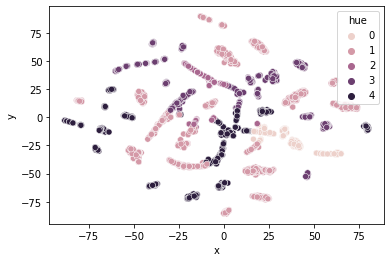

In [56]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_ingridgoeswest.jpg')

# Big Sick

## LDA

In [195]:
#read in the Big Sick
BigSick = pd.read_csv('BigSick.csv')
BigSick.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785


In [196]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigSick['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [197]:
#stemming tweets

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [198]:
#adding to Big Sick dataframe 

#stemmed tweets list version
BigSick['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in BigSick['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

BigSick['string_stemmed'] = stemmed_tweets_str_lst

BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384,"[kumailn, saw, big, sick, amaz, happi, wife, r...",kumailn saw big sick amaz happi wife recov
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268,"[kumailn, finish, big, sick, fuck, good]",kumailn finish big sick fuck good
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106,"[ad, video, youtub, playlist, 3oxcf1nudi, s5e2...",ad video youtub playlist 3oxcf1nudi s5e29 2017...
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017,"[kumailn, damn, watch, big, sick, realli, enjoy]",kumailn damn watch big sick realli enjoy
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785,"[begin, relationship, omg, funni, love, sens, ...",begin relationship omg funni love sens humour ...


In [199]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigSick['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,007,00pm,01,02,025,02uemq83hd,03,03mz3dbxtl,...,ztbqrlfr7j,zto8ktfnwv,ztxyln1gso,zucchini,zucker,zumanurr,zve60sra4b,zw1ukjimji,zy3pcbgrrv,zzo9yhxcjp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigSick['stemmed'])

In [201]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in BigSick['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [202]:
#running LDA model for The Big Sick
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
#created a for loop to seperate Topic and Words for clairty
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.037*"big" + 0.036*"sick" + 0.007*"like" + 0.007*"kumail" + 0.006*"women" + 0.006*"film" + 0.005*"watch" + 0.004*"play" + 0.004*"brown" + 0.003*"make"
Topic 1 
Words: 0.060*"big" + 0.059*"sick" + 0.023*"watch" + 0.015*"kumailn" + 0.013*"love" + 0.011*"movi" + 0.007*"like" + 0.007*"film" + 0.006*"michael" + 0.006*"showalt"
Topic 2 
Words: 0.032*"big" + 0.031*"sick" + 0.012*"2" + 0.012*"3" + 0.011*"love" + 0.011*"5" + 0.010*"bird" + 0.010*"ladi" + 0.009*"4" + 0.009*"water"
Topic 3 
Words: 0.058*"big" + 0.057*"sick" + 0.020*"2017" + 0.015*"kumail" + 0.012*"nanjiani" + 0.010*"valley" + 0.010*"silicon" + 0.009*"talk" + 0.008*"deal" + 0.007*"fear"
Topic 4 
Words: 0.090*"big" + 0.089*"sick" + 0.021*"watch" + 0.020*"movi" + 0.018*"kumailn" + 0.010*"good" + 0.010*"love" + 0.007*"like" + 0.006*"film" + 0.006*"time"


In [205]:
#Display Big Sick LDA
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_bigsick.html')

## Big Sick TSNE 

In [206]:
#LDA matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [207]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X)) #make matrix into an array
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

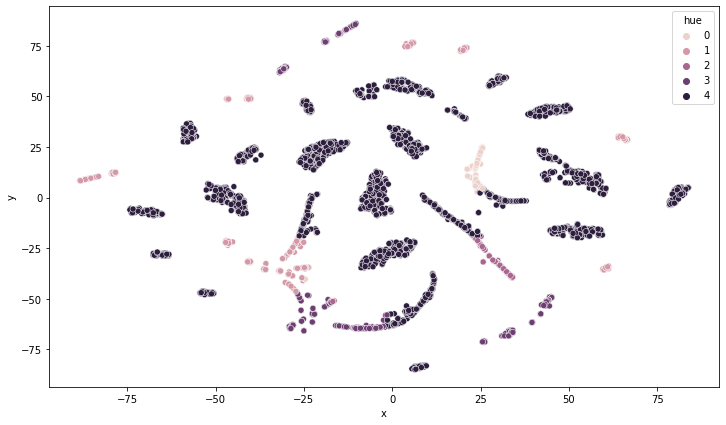

In [208]:
#plot of reduced dimensionality for the movie Big Sick
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax=ax,
    data=embedding)
plt.savefig('images/tsne_bigsick.jpg')

# Gone Girl

## LDA

In [70]:
#read in Gone Girl csv
GoneGirl = pd.read_csv('GoneGirl.csv')
GoneGirl.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005


In [72]:
#tokenizing each tweet
tokenized_tweets_GoneGirl = []
for tweet in GoneGirl['tweet']:
    tokenized_tweets_GoneGirl.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_GoneGirl

In [73]:
#stemming each tweet
stemmed_tweets=[]
for tweet in tokenized_tweets_GoneGirl:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [74]:
#adding to Gone Girl dataframe 

#stemmed tweets list version
GoneGirl['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in GoneGirl['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

GoneGirl['string_stemmed'] = stemmed_tweets_str_lst

GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904,"[untildawn, spoiler, gone, girl, phalang, enou...",untildawn spoiler gone girl phalang enough cri...
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588,"[chlomeganda, gone, girl, chloeeee]",chlomeganda gone girl chloeeee
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824,"[untildawn, spoiler, open, bear, trap, cri, go...",untildawn spoiler open bear trap cri gone girl...
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960,"[suspect, indict, vallejo, gone, girl, kidnap,...",suspect indict vallejo gone girl kidnap case h...
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005,"[gone, girl, fuck, crazi, movi, thumbsup]",gone girl fuck crazi movi thumbsup


In [75]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(GoneGirl['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000th,01,02,039,04utpoqzdk,06izylta51,06zxxykdsj,07wgg3sjh9,08fi9pg6oi,...,zt,zta9g7kncl,ztksz6zurr,zulaikhafadir,zulfikamohd,zurich,zusak,zv7jly9wel,zvuwfji59v,zzts2ihfdp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#numbers to words dictionary
dictionary = corpora.Dictionary(GoneGirl['stemmed'])

In [77]:
#bag of words
corpus = []
for tweet in GoneGirl['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [78]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.051*"gonegirl" + 0.044*"girl" + 0.043*"gone" + 0.018*"watch" + 0.017*"28" + 0.014*"ladymaryordi" + 0.013*"movi" + 0.013*"abeymarindo" + 0.012*"like" + 0.010*"time"
Topic 1 
Words: 0.136*"girl" + 0.116*"gone" + 0.020*"read" + 0.017*"gillian" + 0.017*"flynn" + 0.016*"train" + 0.015*"book" + 0.013*"join" + 0.012*"qwqgukxak4" + 0.010*"love"
Topic 2 
Words: 0.113*"girl" + 0.113*"gone" + 0.022*"movi" + 0.017*"crazi" + 0.016*"watch" + 0.007*"like" + 0.007*"fuck" + 0.007*"kidnap" + 0.006*"claim" + 0.006*"realli"
Topic 3 
Words: 0.115*"girl" + 0.115*"gone" + 0.046*"watch" + 0.034*"movi" + 0.009*"ever" + 0.009*"good" + 0.008*"seen" + 0.008*"book" + 0.007*"gonegirl" + 0.006*"ben"
Topic 4 
Words: 0.112*"girl" + 0.107*"gone" + 0.037*"watch" + 0.013*"fuck" + 0.013*"movi" + 0.012*"think" + 0.010*"read" + 0.010*"time" + 0.009*"final" + 0.008*"like"


In [79]:
#Display Gone Girl LDA model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_gonegirl.html')

## TSNE 

In [81]:
#create matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [82]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

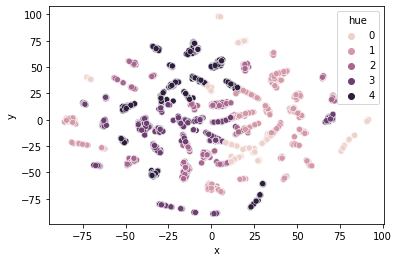

In [83]:
#plot of reduced dimensionality for Gone Girl
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)
plt.savefig('images/tsne_gonegirl.jpg')

# 17 Again

## LDA 

In [84]:
#read in 17 Again
Again17 = pd.read_csv('Again17.csv')
Again17.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552


In [85]:
#tokenizing each tweet
tokenized_tweets_17Again = []
for tweet in Again17['tweet']:
    tokenized_tweets_17Again.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_17Again

In [86]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets_17Again:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [87]:
#adding to 17 Again to dataframe 

#stemmed tweets list version
Again17['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in Again17['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

Again17['string_stemmed'] = stemmed_tweets_str_lst

Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bit, bqye6j, dress, similar, zac, posen, dres...",bit bqye6j dress similar zac posen dress vanes...
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023,"[watch, 17, miss, movi]",watch 17 miss movi
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232,"[conallen, haha, surpris, 17, seem, trigger, q...",conallen haha surpris 17 seem trigger quit con...
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588,"[tjlyricz, gonna, watch, 17, gotta, loov, late...",tjlyricz gonna watch 17 gotta loov late night ...
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552,"[jacobjunior7, yeah, boyish, realli, pay, atte...",jacobjunior7 yeah boyish realli pay attent saw...


In [88]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Again17['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,02,021010,03,04,05,06,07,08,...,zoeblais2010zo,zomg,zone,zoo,zoom,zoradarosa,zqaddict,zxfsb,zzzdaria,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Again17['stemmed'])

In [90]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in Again17['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [91]:
#running LDA model for the movie 17 Again
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.101*"17" + 0.054*"watch" + 0.034*"zac" + 0.030*"efron" + 0.023*"movi" + 0.010*"love" + 0.008*"like" + 0.008*"one" + 0.007*"lol" + 0.006*"make"
Topic 1 
Words: 0.095*"17" + 0.044*"zoeblai" + 0.020*"beauti" + 0.020*"4" + 0.019*"win" + 0.018*"tweet" + 0.018*"person" + 0.017*"pack" + 0.017*"prize" + 0.017*"piec"
Topic 2 
Words: 0.140*"17" + 0.076*"watch" + 0.029*"movi" + 0.021*"zac" + 0.017*"efron" + 0.016*"love" + 0.011*"like" + 0.009*"17again" + 0.008*"lol" + 0.007*"3"
Topic 3 
Words: 0.096*"17" + 0.027*"movi" + 0.024*"watch" + 0.014*"lol" + 0.014*"zac" + 0.013*"efron" + 0.013*"good" + 0.008*"think" + 0.008*"watchin" + 0.008*"like"
Topic 4 
Words: 0.073*"17" + 0.029*"like" + 0.016*"love" + 0.016*"feel" + 0.007*"young" + 0.006*"day" + 0.005*"everyth" + 0.005*"watch" + 0.005*"17again" + 0.005*"make"


In [92]:
#display LDA model for the movie 17 Again
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_17again.html')

## TSNE 

In [93]:
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [94]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

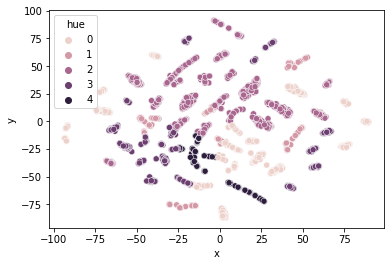

In [95]:
#plot reduce dimensionality for the movie 17 Again
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)
plt.savefig('images/tsne_17again')

# Jennifer's Body

## LDA 

In [96]:
#read in the Big Sick
JennifersBody = pd.read_csv('JennifersBody.csv')
JennifersBody.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070


In [97]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in JennifersBody['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [98]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [99]:
#adding to Jennifer's Body dataframe 

#stemmed tweets list version
JennifersBody['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in JennifersBody['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

JennifersBody['string_stemmed'] = stemmed_tweets_str_lst

JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411,"[wear, jennif, bodi, shirt, red, black, scarf,...",wear jennif bodi shirt red black scarf tomorro...
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[watch, jennif, bodi, erin, jess, make, breakf...",watch jennif bodi erin jess make breakfast din...
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037,"[ok, threw, black, ropey, stuff, like, jennif,...",ok threw black ropey stuff like jennif bodi st...
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777,"[jennif, bodi, soundtrack, good, movi, decent]",jennif bodi soundtrack good movi decent
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070,"[jennif, bodi, possibl, one, worst, film, watc...",jennif bodi possibl one worst film watch year ...


In [100]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(JennifersBody['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,02,03,039,06,07,08,09,...,zhane,zig,zk3y3icz,zombi,zombieland,zondara,zone,zooland,zq,zulhamyoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(JennifersBody['stemmed'])

In [102]:
#list of words to bag of words format
corpus = []
for tweet in JennifersBody['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [103]:
#run LDA model for Jennifer's Body
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.096*"jennif" + 0.096*"bodi" + 0.047*"fox" + 0.047*"megan" + 0.040*"watch" + 0.015*"movi" + 0.009*"watchin" + 0.007*"good" + 0.007*"like" + 0.005*"hot"
Topic 1 
Words: 0.104*"jennif" + 0.104*"bodi" + 0.047*"movi" + 0.014*"ever" + 0.009*"nowwatch" + 0.008*"like" + 0.008*"stupid" + 0.007*"time" + 0.007*"shit" + 0.007*"bit"
Topic 2 
Words: 0.086*"bodi" + 0.086*"jennif" + 0.023*"movi" + 0.017*"watch" + 0.017*"love" + 0.016*"megan" + 0.015*"fox" + 0.014*"choic" + 0.012*"horror" + 0.011*"nw"
Topic 3 
Words: 0.134*"jennif" + 0.134*"bodi" + 0.069*"watch" + 0.020*"movi" + 0.009*"like" + 0.007*"bit" + 0.006*"lol" + 0.006*"good" + 0.006*"love" + 0.005*"go"
Topic 4 
Words: 0.095*"jennif" + 0.095*"bodi" + 0.053*"watch" + 0.018*"movi" + 0.012*"lol" + 0.011*"night" + 0.007*"see" + 0.007*"seen" + 0.006*"good" + 0.005*"last"


In [104]:
#display LDA model for Jennifer's Body
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_jennifersbody.html')

## TSNE 

In [105]:
#reduce dimensionality
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [106]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

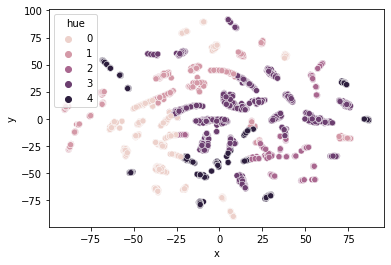

In [107]:
# Jennifer's Body plot of reduced dimensionality
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)
plt.savefig('images/tsne_jennifersbody.jpg')

# The Shape of Water

## LDA

In [108]:
#read in The Shape of Water
ShapeOfWater = pd.read_csv('ShapeOfWater.csv')
ShapeOfWater.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003


In [109]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in ShapeOfWater['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [110]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)
# stemmed_tweets

In [111]:
#adding to The Shape of Water dataframe 

#stemmed tweets list version
ShapeOfWater['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in ShapeOfWater['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

ShapeOfWater['string_stemmed'] = stemmed_tweets_str_lst

ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732,"[fab, watch, shape, water, togeth, hate, heada...",fab watch shape water togeth hate headass must...
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994,"[hellohousemous, shape, water, model, averi, v...",hellohousemous shape water model averi vulp ro...
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953,"[shape, water, like, alien, ameli, ameli, bett...",shape water like alien ameli ameli better stil...
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960,"[charliewswain, coupl, shape, water, babi, gre...",charliewswain coupl shape water babi grew beco...
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003,"[power, sure, beat, spew, prais, trump, come, ...",power sure beat spew prais trump come costar s...


In [112]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(ShapeOfWater['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000x,00pm,01297,01425612393,018,02,0215madman,02mvwewkxo,03,...,ztq9uerwad,ztxmxhuphw,zujbgxhisa,zuldim,zvk56tlfg6,zvkewslwtd,zyli,zymmetra,zyrtigppmr,zzck2vlrfz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(ShapeOfWater['stemmed'])

In [114]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in ShapeOfWater['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [115]:
#run LDA model for the movie The Shape of Water
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.050*"water" + 0.049*"shape" + 0.017*"film" + 0.016*"movi" + 0.010*"best" + 0.009*"like" + 0.008*"2" + 0.008*"oscar" + 0.008*"year" + 0.008*"love"
Topic 1 
Words: 0.079*"shape" + 0.078*"water" + 0.011*"movi" + 0.010*"love" + 0.009*"like" + 0.008*"watch" + 0.006*"fish" + 0.005*"beauti" + 0.004*"think" + 0.004*"creatur"
Topic 2 
Words: 0.093*"water" + 0.091*"shape" + 0.011*"watch" + 0.010*"2017" + 0.009*"del" + 0.009*"toro" + 0.008*"guillermo" + 0.008*"nanotub" + 0.007*"chang" + 0.007*"fish"
Topic 3 
Words: 0.054*"water" + 0.054*"shape" + 0.024*"watch" + 0.017*"movi" + 0.017*"film" + 0.010*"best" + 0.007*"realli" + 0.006*"del" + 0.006*"toro" + 0.006*"pictur"
Topic 4 
Words: 0.031*"shape" + 0.031*"water" + 0.010*"del" + 0.010*"guillermo" + 0.010*"toro" + 0.010*"2017" + 0.008*"movi" + 0.006*"dan" + 0.006*"watch" + 0.004*"day"


In [117]:
#display LDA model for The Shape of Water
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_shapeofwater.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.024754  0.088391       1        1  28.039906
0     -0.108260 -0.064675       2        1  27.435951
1     -0.030175  0.040408       3        1  25.233114
3     -0.007859  0.001366       4        1  13.700094
4      0.121540 -0.065490       5        1   5.590934, topic_info=          Term        Freq       Total Category  logprob  loglift
9        watch  611.000000  611.000000  Default  30.0000  30.0000
108        del  275.000000  275.000000  Default  29.0000  29.0000
113       toro  265.000000  265.000000  Default  28.0000  28.0000
341  guillermo  237.000000  237.000000  Default  27.0000  27.0000
99        film  573.000000  573.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
553      black    7.251414   93.522444   Topic5  -6.2253   0.3270
176       need    6.740227  114.032240   Topic5  -6.2984   0.0556
500        dir    6.079770   47.046609   Topic5  -6.4015   0.8379
158       look    6.553100  112.865468   Topic5  -6.3265   0.0378
99        film    6.869106  573.159297   Topic5  -6.2794  -1.5401

[383 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
226       1  0.034027       1
226       2  0.828001       1
226       3  0.102082       1
226       5  0.034027       1
834       1  0.178244      10
...     ...       ...     ...
60        3  0.092827    year
60        4  0.070985    year
1623      4  0.919042     yep
780       1  0.978834  youtub
780       3  0.015537  youtub

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4, 5])

## TSNE 

In [119]:
#create LDA topic words matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [120]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

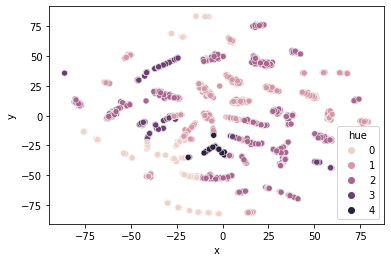

In [121]:
#plot of reduced dimensionality for The Shape of Water
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding
)
plt.savefig('images/tsne_shapeofwater.jpg')

# The Big Short

## LDA 

In [122]:
#read in the Big Sick
BigShort = pd.read_csv('BigShort.csv')
BigShort.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [123]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigShort['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [124]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [125]:
#adding to Big Short dataframe 

#lemmatized tweets list version
BigShort['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BigShort['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BigShort['string_lemmatized'] = lemmatized_tweets_str_lst

BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280,"[watched, big, short, fascinating, film, even,...",watched big short fascinating film even compre...
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588,"[roger, ailes, megyn, kelly, harassment, film,...",roger ailes megyn kelly harassment film work b...
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249,"[big, short, next, financial, crisis, way, xiv...",big short next financial crisis way xiv5se7l6g
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089,"[breitbartnews, call, big, short, ii, shot, ro...",breitbartnews call big short ii shot rolling c...
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[rewatching, big, short, maybe, pwqcfw74pw]",rewatching big short maybe pwqcfw74pw


In [126]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigShort['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00ksrhf6uo,00pm,00s,01937,01dkpbix9a,03,039,03cbravvpd,...,zxop2ebm2w,zxxlkbw78v,zxygjs3psa,zy3b6tizry,zyacap52vo,zybbav10jn,zybkohxdb6,zyr5zsl3jd,zys0dx7zcn,zyymx0kdv0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigShort['lemmatize'])

In [128]:
#bag of words
corpus = []
for tweet in BigShort['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [129]:
#run LDA model for The Big Short
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.105*"big" + 0.105*"short" + 0.012*"watching" + 0.011*"movie" + 0.011*"inside" + 0.011*"new" + 0.010*"book" + 0.010*"doomsday" + 0.010*"machine" + 0.009*"michael"
Topic 1 
Words: 0.096*"big" + 0.095*"short" + 0.025*"movie" + 0.025*"crisis" + 0.024*"next" + 0.024*"financial" + 0.023*"way" + 0.011*"film" + 0.009*"good" + 0.007*"watch"
Topic 2 
Words: 0.080*"big" + 0.078*"short" + 0.023*"movie" + 0.011*"truth" + 0.010*"via" + 0.009*"film" + 0.008*"bank" + 0.007*"thefinalsay1" + 0.006*"gt" + 0.006*"good"
Topic 3 
Words: 0.026*"big" + 0.026*"short" + 0.008*"2" + 0.007*"10" + 0.006*"market" + 0.004*"think" + 0.004*"people" + 0.003*"perfect" + 0.003*"risk" + 0.003*"housing"
Topic 4 
Words: 0.082*"big" + 0.081*"short" + 0.017*"watch" + 0.011*"watched" + 0.011*"netflix" + 0.010*"one" + 0.010*"movie" + 0.008*"dick" + 0.008*"cheney" + 0.007*"film"


In [131]:
#display LDA model for The Big Short
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_bigshort.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.043211  0.123039       1        1  37.347419
1     -0.112622 -0.056674       2        1  27.686092
4      0.017025  0.045544       3        1  15.596570
2     -0.025187 -0.087275       4        1  14.921132
3      0.163995 -0.024633       5        1   4.448787, topic_info=           Term         Freq        Total Category  logprob  loglift
25       crisis   374.000000   374.000000  Default  30.0000  30.0000
28          way   331.000000   331.000000  Default  29.0000  29.0000
27         next   387.000000   387.000000  Default  28.0000  28.0000
26    financial   485.000000   485.000000  Default  27.0000  27.0000
3           big  4543.000000  4543.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
641           1     4.918352    42.688526   Topic5  -6.1031   0.9516
664          gt     4.996046    53.532648   Topic5  -6.0875   0.7409
27         next     5.411309   387.991484   Topic5  -6.0076  -1.1600
1017        guy     4.508756    60.020805   Topic5  -6.1901   0.5239
408        2015     4.369961    89.347292   Topic5  -6.2214   0.0948

[325 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5117      5  0.708560   01937
641       1  0.445084       1
641       2  0.257680       1
641       3  0.023425       1
641       4  0.140553       1
...     ...       ...     ...
1339      4  0.133050   would
1339      5  0.133050   would
24        2  0.646880  writer
24        3  0.010605  writer
24        4  0.339347  writer

[585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 3, 4])

##  TSNE 

In [133]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [134]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

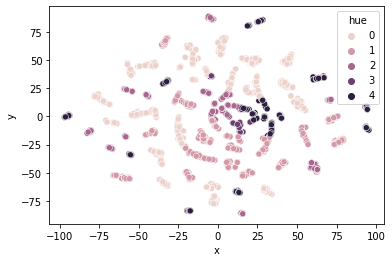

In [135]:
#scotter plot of reduced dimensionality for the movie The Big Short
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_bigshort.jpg')

# Cloudy With a Chance of Meatballs

## LDA

In [136]:
#read in Cloudy with a Chance of Meatballs csv
CloudywithaChanceofMeatballs = pd.read_csv('CloudywithaChanceofMeatballs.csv')
CloudywithaChanceofMeatballs.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679


In [137]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in CloudywithaChanceofMeatballs['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [138]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [139]:
#adding to Cloudy With a Chance of Meatballs dataframe 

#lemmatized tweets list version
CloudywithaChanceofMeatballs['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in CloudywithaChanceofMeatballs['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

CloudywithaChanceofMeatballs['string_lemmatized'] = lemmatized_tweets_str_lst

CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124,"[cloudy, chance, meatball]",cloudy chance meatball
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164,"[redshiftlove, cloudy, chance, meatball]",redshiftlove cloudy chance meatball
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500,"[think, officially, time, address, whole, seen...",think officially time address whole seen cloud...
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588,"[cloudy, chance, meatball, blu, ray, woo]",cloudy chance meatball blu ray woo
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679,"[ollievoso, like, cloudy, chance, meatball, wo...",ollievoso like cloudy chance meatball would aw...


In [140]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(CloudywithaChanceofMeatballs['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00p,00pm,01,02,03,037,039,040,...,zodiaclife,zombieland,zomg,zonarosa,zondara,zone,zooted,zpxdhxzw6g,zrim,zshnli5q
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(CloudywithaChanceofMeatballs['lemmatize'])

In [142]:
#bag of words
corpus = []
for tweet in CloudywithaChanceofMeatballs['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [143]:
#run LDA model on Cloudy with a Chance of Meatballs
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.088*"meatball" + 0.088*"chance" + 0.088*"cloudy" + 0.029*"movie" + 0.020*"love" + 0.015*"watching" + 0.009*"seen" + 0.009*"watch" + 0.007*"film" + 0.007*"one"
Topic 1 
Words: 0.067*"cloudy" + 0.067*"meatball" + 0.066*"chance" + 0.028*"movie" + 0.016*"park" + 0.016*"tonight" + 0.015*"free" + 0.012*"bit" + 0.011*"night" + 0.009*"time"
Topic 2 
Words: 0.130*"cloudy" + 0.130*"chance" + 0.130*"meatball" + 0.046*"watching" + 0.014*"dvd" + 0.010*"movie" + 0.008*"watch" + 0.007*"p" + 0.006*"e" + 0.005*"inandout"
Topic 3 
Words: 0.090*"cloudy" + 0.089*"meatball" + 0.089*"chance" + 0.019*"movie" + 0.013*"ray" + 0.013*"blu" + 0.012*"watching" + 0.011*"3" + 0.009*"3d" + 0.008*"bit"
Topic 4 
Words: 0.094*"cloudy" + 0.093*"chance" + 0.092*"meatball" + 0.019*"bit" + 0.014*"great" + 0.012*"good" + 0.012*"movie" + 0.011*"disc" + 0.010*"edition" + 0.010*"watchin"


In [145]:
#display LDA model on Cloudy with a Chance of Meatballs
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
# pyLDAvis.save_html(vis, 'images/lda_cloudywithachanceofmeatballs.html')

## TSNE

In [147]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [148]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

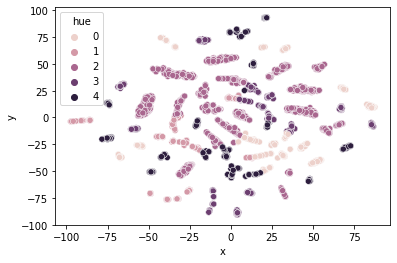

In [149]:
#scatter plot of reduced dimensionality for the movie Cloudy with a Chance of Meatballs
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_cloudywithachanceofmeatballs.jpg')

# Wall-E

## LDA 

In [150]:
#read in Wall-E
WallE = pd.read_csv('Walle.csv')
WallE.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [151]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in WallE['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [152]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [153]:
#adding to Wall-E dataframe 

#lemmatized tweets list version
WallE['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in WallE['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

WallE['string_lemmatized'] = lemmatized_tweets_str_lst

WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[breaking, news, wall, e, battier, run, found,...",breaking news wall e battier run found transpo...
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[think, mind, complex, wall, e, wutendeskind]",think mind complex wall e wutendeskind
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482,"[bout, watch, wall, e, best, movie, ever]",bout watch wall e best movie ever
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[finally, home, full, micky, n, watchn, wall, e]",finally home full micky n watchn wall e
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[erinichristine, word, wall, e]",erinichristine word wall e


In [154]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(WallE['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,002,00s,01709,0317,04,05,05fj,06,...,zomg,zone,zoo,zu1ol,zulky,zygbot,zzz,zzzz,zzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(WallE['lemmatize'])

In [156]:
#bag of words
corpus = []
for tweet in WallE['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [157]:
#running LDA Wall-E model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.083*"e" + 0.083*"wall" + 0.012*"watched" + 0.009*"movie" + 0.007*"night" + 0.007*"like" + 0.007*"last" + 0.007*"bit" + 0.006*"3" + 0.006*"saw"
Topic 1 
Words: 0.075*"wall" + 0.074*"e" + 0.013*"first" + 0.012*"time" + 0.011*"movie" + 0.008*"watch" + 0.008*"watching" + 0.007*"watched" + 0.007*"like" + 0.006*"pixar"
Topic 2 
Words: 0.115*"e" + 0.114*"wall" + 0.034*"watching" + 0.023*"movie" + 0.009*"watch" + 0.008*"time" + 0.008*"love" + 0.007*"like" + 0.007*"cute" + 0.007*"tinyurl"
Topic 3 
Words: 0.091*"e" + 0.090*"wall" + 0.014*"watching" + 0.011*"love" + 0.010*"bit" + 0.009*"good" + 0.009*"movie" + 0.009*"better" + 0.007*"watch" + 0.006*"make"
Topic 4 
Words: 0.072*"e" + 0.072*"wall" + 0.011*"good" + 0.010*"nemo" + 0.010*"watching" + 0.009*"gt" + 0.009*"movie" + 0.007*"pixar" + 0.007*"finding" + 0.007*"story"


In [159]:
#display LDA Wall-E model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_walle.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.029290  0.046599       1        1  34.722164
3      0.028044  0.073960       2        1  21.776490
0      0.039947 -0.040517       3        1  16.596586
4     -0.129875 -0.004853       4        1  13.609577
1      0.032594 -0.075189       5        1  13.295183, topic_info=        Term         Freq        Total Category  logprob  loglift
270    first   139.000000   139.000000  Default  30.0000  30.0000
38      nemo    82.000000    82.000000  Default  29.0000  29.0000
226       gt    77.000000    77.000000  Default  28.0000  28.0000
317  watched   240.000000   240.000000  Default  27.0000  27.0000
3          e  4797.000000  4797.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
212      one    24.999807   160.710043   Topic5  -5.6122   0.1570
4        eve    19.006510    92.620581   Topic5  -5.8863   0.4340
660    robot    20.286560   170.344943   Topic5  -5.8211  -0.1101
209     cute    18.197474   225.303875   Topic5  -5.9298  -0.4984
805  tonight    15.378676    68.693659   Topic5  -6.0981   0.5211

[393 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5195      2  0.782145       00
1022      2  0.075070      000
1022      3  0.225211      000
1022      5  0.675633      000
588       1  0.318937        1
...     ...       ...      ...
4680      3  0.945536    wqh5g
4470      2  0.150247       ya
4470      5  0.751233       ya
5982      4  0.716139     yall
1967      2  0.838405  youtube

[797 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

## TSNE 

In [161]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [162]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

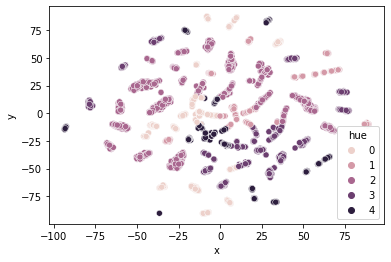

In [163]:
#Wall-E reduced dimensionality T-SNE scatter plot
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_walle.jpg')

# Slumdog Millionaire

## LDA 

In [164]:
#read in Slumdog Millionaire csv
SlumdogMillionaire = pd.read_csv('SlumdogMillionaire.csv')
SlumdogMillionaire.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [165]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SlumdogMillionaire['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [166]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [167]:
#adding to Slumdog Millionaire dataframe 

#lemmatized tweets list version
SlumdogMillionaire['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SlumdogMillionaire['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SlumdogMillionaire['string_lemmatized'] = lemmatized_tweets_str_lst

SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574,"[krael52, shravani, keethi, want, play, wanty,...",krael52 shravani keethi want play wanty beat b...
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[outside, sam, jefferson, big, si, chillin, po...",outside sam jefferson big si chillin porch bou...
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331,"[1heavenlyflower, omg, favorite, movie, slumdo...",1heavenlyflower omg favorite movie slumdog mil...
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093,"[crapola, news, slumdog, millionaire, grab, 5,...",crapola news slumdog millionaire grab 5 nod eu...
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[standing, line, lparaggio, visa, slumdog, mil...",standing line lparaggio visa slumdog millionai...


In [168]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SlumdogMillionaire['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,039,04am,05,057allowances,06,07,08,085,...,zoo,zu4ak,zuko,zukoso,zumg,zvydy,zxsfj,zzzs,zzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
##dictionary of numbers to words
dictionary = corpora.Dictionary(SlumdogMillionaire['lemmatize'])

In [170]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in SlumdogMillionaire['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [171]:
#running LDA model on Slumdog Millionaire
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.076*"slumdog" + 0.075*"millionaire" + 0.045*"bit" + 0.029*"school" + 0.025*"new" + 0.022*"lie" + 0.022*"marketing" + 0.022*"kim" + 0.022*"klaver" + 0.018*"kid"
Topic 1 
Words: 0.108*"slumdog" + 0.107*"millionaire" + 0.058*"watching" + 0.018*"time" + 0.017*"movie" + 0.010*"first" + 0.008*"lol" + 0.007*"film" + 0.007*"great" + 0.007*"finally"
Topic 2 
Words: 0.057*"slumdog" + 0.055*"millionaire" + 0.027*"bit" + 0.018*"pinto" + 0.016*"freida" + 0.013*"boyle" + 0.011*"39" + 0.011*"film" + 0.011*"dev" + 0.010*"patel"
Topic 3 
Words: 0.085*"slumdog" + 0.077*"millionaire" + 0.017*"bit" + 0.017*"movie" + 0.016*"star" + 0.015*"kid" + 0.012*"child" + 0.011*"trust" + 0.010*"fund" + 0.008*"lol"
Topic 4 
Words: 0.106*"millionaire" + 0.106*"slumdog" + 0.047*"movie" + 0.026*"good" + 0.021*"watching" + 0.015*"watch" + 0.014*"watched" + 0.010*"love" + 0.010*"watchin" + 0.009*"great"


In [173]:
#display Slumdog Millionaire LDA model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_slumdogmillionaire.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.105386 -0.068617       1        1  34.645820
1     -0.097669 -0.016096       2        1  20.463227
3     -0.022954  0.012267       3        1  19.428073
0      0.177813 -0.092684       4        1  14.787974
2      0.048196  0.165130       5        1  10.674906, topic_info=             Term        Freq        Total Category  logprob  loglift
48       watching  982.000000   982.000000  Default  30.0000  30.0000
61            bit  764.000000   764.000000  Default  29.0000  29.0000
1630       school  266.000000   266.000000  Default  28.0000  28.0000
133          good  473.000000   473.000000  Default  27.0000  27.0000
575           new  233.000000   233.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
249   mountaineer   13.161812    27.683240   Topic5  -6.0027   1.4938
24          movie   24.678849  1200.506731   Topic5  -5.3741  -1.6473
171          love   17.781731   266.134812   Topic5  -5.7018  -0.4686
36        tinyurl   14.600092    62.307945   Topic5  -5.8990   0.7862
27          award   14.472732    72.922371   Topic5  -5.9077   0.6201

[325 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
369       2  0.905820       127
369       4  0.041174       127
811       4  0.966334    153oak
676       1  0.947687    19z1vn
4400      1  0.115439    1givy6
...     ...       ...       ...
101       2  0.170088      year
101       3  0.585860      year
101       4  0.018899      year
101       5  0.075595      year
2167      3  0.866804  youngest

[629 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

## TSNE 

In [174]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [175]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

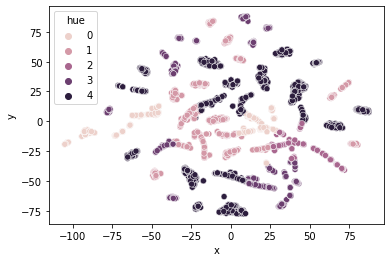

In [176]:
#plot tsne
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.savefig('images/tsne_slumdogmillionaire.jpg')

# Bird Box

## LDA 

In [177]:
#read in Bird Box csv
BirdBox = pd.read_csv('BirdBox.csv')
BirdBox.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [178]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BirdBox['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [179]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [180]:
#adding to Bird Box dataframe 

#lemmatized tweets list version
BirdBox['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BirdBox['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BirdBox['string_lemmatized'] = lemmatized_tweets_str_lst

BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [181]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BirdBox['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BirdBox['lemmatize'])

In [183]:
#bag of words
corpus = []
for tweet in BirdBox['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [184]:
#running Bird Box LDA model 
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.074*"box" + 0.072*"bird" + 0.006*"birdbox" + 0.005*"via" + 0.004*"see" + 0.004*"like" + 0.004*"vintage" + 0.004*"star" + 0.003*"one" + 0.003*"gift"
Topic 1 
Words: 0.072*"news" + 0.040*"today" + 0.039*"usa" + 0.022*"box" + 0.021*"netflix" + 0.021*"bird" + 0.021*"amazon" + 0.021*"google" + 0.021*"credit" + 0.021*"health"
Topic 2 
Words: 0.054*"bird" + 0.052*"box" + 0.019*"birdbox" + 0.013*"like" + 0.010*"movie" + 0.008*"moviemenfess" + 0.006*"2" + 0.006*"watching" + 0.005*"bad" + 0.005*"netflix"
Topic 3 
Words: 0.042*"box" + 0.042*"bird" + 0.021*"birdbox" + 0.007*"year" + 0.007*"soca" + 0.006*"2019" + 0.005*"7" + 0.005*"world" + 0.005*"playing" + 0.004*"julius"
Topic 4 
Words: 0.021*"box" + 0.020*"bird" + 0.014*"watch" + 0.013*"gt" + 0.012*"birdbox" + 0.008*"bobo" + 0.008*"wooden" + 0.007*"gift" + 0.006*"ticket" + 0.006*"wood"


In [186]:
#displaying Bird Box LDA modelb
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_birdbox.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.069416  0.028955       1        1  29.247259
2     -0.082703  0.052412       2        1  25.495995
1      0.263838  0.017976       3        1  19.431414
3     -0.075022  0.053324       4        1  16.980074
4     -0.036697 -0.152667       5        1   8.845258, topic_info=        Term         Freq        Total Category  logprob  loglift
60      news  1081.000000  1081.000000  Default  30.0000  30.0000
1168     usa   580.000000   580.000000  Default  29.0000  29.0000
152    today   609.000000   609.000000  Default  28.0000  28.0000
1078  google   313.000000   313.000000  Default  27.0000  27.0000
1151  amazon   318.000000   318.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
78      like    27.609099   417.516278   Topic5  -5.4850  -0.2909
210      one    18.328234   189.503846   Topic5  -5.8947   0.0893
1061     top    13.867520    57.279208   Topic5  -6.1736   1.0069
1024       u    14.253611    99.310558   Topic5  -6.1461   0.4840
1084   thing    13.850499    98.260029   Topic5  -6.1748   0.4660

[323 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
10091      5  0.906688   020
491        1  0.074026     1
491        2  0.564445     1
491        3  0.009253     1
491        4  0.166558     1
...      ...       ...   ...
89         1  0.200557  year
89         2  0.263890  year
89         3  0.036945  year
89         4  0.490836  year
89         5  0.015833  year

[648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4, 5])

## TSNE 

In [188]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [189]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

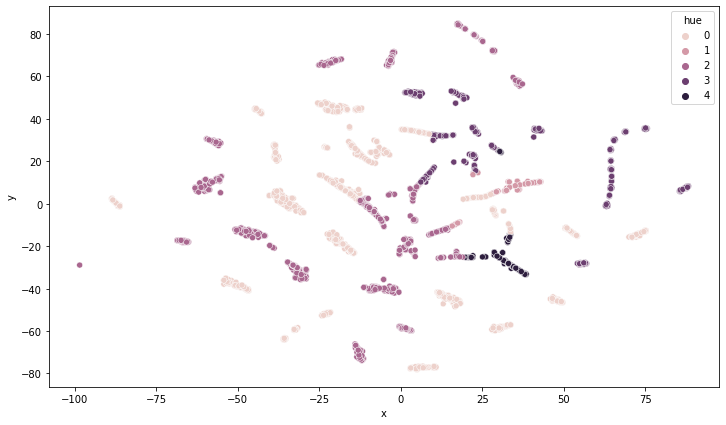

In [193]:
#t-sne plot
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax=ax,
    data=embedding)
# plt.savefig('images/tsne_birdbox.jpg')

# Silver Linings Playbook

## LDA 

In [209]:
#read in Silver Linings Playbook csv
SilverLiningsPlaybook = pd.read_csv('SilverLiningsPlaybook.csv')
SilverLiningsPlaybook.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [210]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SilverLiningsPlaybook['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [211]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [212]:
#adding to Silver Linings Playbook dataframe 

#lemmatized tweets list version
SilverLiningsPlaybook['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SilverLiningsPlaybook['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SilverLiningsPlaybook['string_lemmatized'] = lemmatized_tweets_str_lst

SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [213]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SilverLiningsPlaybook['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(SilverLiningsPlaybook['lemmatize'])

In [215]:
#bag of words
corpus = []
for tweet in SilverLiningsPlaybook['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [ ]:
#run LDA model on Silver Linings Playbook
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

In [239]:
#Display LDA model on Silver Linings Playbook
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.075953  0.057321       1        1  35.467096
0      0.261312  0.013045       2        1  22.297329
1     -0.071300  0.029132       3        1  16.028832
3     -0.070612  0.047885       4        1  15.686654
2     -0.043446 -0.147384       5        1  10.520089, topic_info=        Term         Freq        Total Category  logprob  loglift
60      news  1092.000000  1092.000000  Default  30.0000  30.0000
1168     usa   586.000000   586.000000  Default  29.0000  29.0000
152    today   616.000000   616.000000  Default  28.0000  28.0000
1078  google   317.000000   317.000000  Default  27.0000  27.0000
1152  credit   311.000000   311.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
399    watch    25.163678   248.545001   Topic5  -5.7511  -0.0383
565     gift    21.427860   161.817459   Topic5  -5.9118   0.2301
1062  wooden    18.221962    93.954620   Topic5  -6.0739   0.6117
27      star    16.750484    88.945024   Topic5  -6.1581   0.5823
78      like    16.899080   415.880705   Topic5  -6.1493  -0.9513

[326 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
10091      3  0.972896   020
491        1  0.592316     1
491        2  0.143592     1
491        3  0.161541     1
491        4  0.098719     1
...      ...       ...   ...
89         5  0.025491  year
2421       1  0.130403  yoda
2421       2  0.065201  yoda
2421       4  0.782418  yoda
2421       5  0.065201  yoda

[696 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 4, 3])

## TSNE

In [244]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [241]:
hm = np.array(X)
hm

array([[0.01181905, 0.01209193, 0.01201001, 0.01189766, 0.95218134],
       [0.01674931, 0.01699234, 0.01681633, 0.01692776, 0.93251425],
       [0.04024493, 0.04079074, 0.04047511, 0.04111893, 0.83737034],
       ...,
       [0.01347228, 0.01348609, 0.01344202, 0.01353753, 0.946062  ],
       [0.0505066 , 0.05089686, 0.05064158, 0.05086124, 0.79709375],
       [0.01677191, 0.9326129 , 0.01675845, 0.01701222, 0.01684455]],
      dtype=float32)

In [242]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

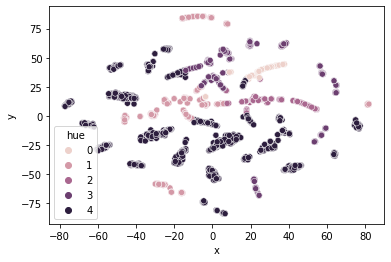

In [243]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Django Unchained

## LDA 

In [245]:
#read in Django Unchained csv
DjangoUnchained = pd.read_csv('DjangoUnchained.csv')
DjangoUnchained.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124


In [248]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in DjangoUnchained['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [250]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [251]:
#adding to Django Unchained dataframe 

#lemmatized tweets list version
DjangoUnchained['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in DjangoUnchained['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

DjangoUnchained['string_lemmatized'] = lemmatized_tweets_str_lst

DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859,"[django, unchained, brilliant, topfilm]",django unchained brilliant topfilm
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486,"[every, 10, second, django, unchained, hear, w...",every 10 second django unchained hear word nigger
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019,"[cause, problem, talking, django, unchained]",cause problem talking django unchained
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767,"[white, house, man, steel, monster, university...",white house man steel monster university lone ...
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124,"[movie, scale, night, shamalyans, village, dja...",movie scale night shamalyans village django un...


In [252]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(DjangoUnchained['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00pm,02,04kov4vvzo,05,06,06troop21,07mwjfqial,08,...,zwlwqncs9i,zwnsrvu2sj,zx77nzpcsi,zx9y3vegjs,zxxgwmoq1t,zybpmuiu0h,zzdecom3wz,zzdu49y8g7,zzk2ayss92,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(DjangoUnchained['lemmatize'])

In [254]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in DjangoUnchained['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [256]:
#running LDA model for Django Unchained
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.089*"django" + 0.086*"unchained" + 0.025*"movie" + 0.018*"watching" + 0.012*"good" + 0.012*"djangounchained" + 0.010*"watch" + 0.008*"time" + 0.008*"finally" + 0.007*"gt"
Topic 1 
Words: 0.081*"django" + 0.079*"unchained" + 0.019*"nigga" + 0.016*"watch" + 0.014*"3" + 0.012*"movie" + 0.012*"like" + 0.009*"film" + 0.008*"2" + 0.007*"die"
Topic 2 
Words: 0.082*"django" + 0.080*"unchained" + 0.010*"movie" + 0.008*"djangounchained" + 0.008*"ray" + 0.008*"blu" + 0.007*"youtube" + 0.006*"copy" + 0.006*"soundtrack" + 0.006*"watched"
Topic 3 
Words: 0.055*"django" + 0.054*"unchained" + 0.015*"djangounchained" + 0.013*"freedom" + 0.009*"used" + 0.008*"light" + 0.008*"moonlight" + 0.007*"anthony" + 0.007*"giant" + 0.007*"soundtrack"
Topic 4 
Words: 0.111*"django" + 0.109*"unchained" + 0.023*"film" + 0.021*"watching" + 0.020*"movie" + 0.014*"best" + 0.013*"tarantino" + 0.009*"time" + 0.008*"djangounchained" + 0.007*"quentin"


In [257]:
#display LDA model for Django Unchained
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.085641 -0.042808       1        1  35.362134
1     -0.029519  0.098468       2        1  19.931228
2      0.013056  0.079881       3        1  17.648284
0     -0.049727 -0.093159       4        1  17.455958
3      0.151831 -0.042382       5        1   9.602396, topic_info=         Term        Freq       Total Category  logprob  loglift
65      nigga  171.000000  171.000000  Default  30.0000  30.0000
90   watching  475.000000  475.000000  Default  29.0000  29.0000
70          3  147.000000  147.000000  Default  28.0000  28.0000
168     watch  295.000000  295.000000  Default  27.0000  27.0000
243      best  238.000000  238.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
155      year   14.430810  192.832808   Topic5  -5.6727  -0.2493
198     slave   12.057120   77.718365   Topic5  -5.8524   0.4797
460     great   12.708059  135.558086   Topic5  -5.7998  -0.0240
616        gt   11.614595   71.432235   Topic5  -5.8898   0.5267
44       film   11.862245  467.265091   Topic5  -5.8687  -1.3304

[350 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
68        1  0.152494           1
68        2  0.559145           1
68        3  0.010166           1
68        4  0.152494           1
68        5  0.142328           1
...     ...       ...         ...
110       3  0.475904     youtube
110       4  0.114873     youtube
110       5  0.180515     youtube
1572      1  0.823521  zo8k55udc7
1592      2  0.837590  zul9gldp8p

[627 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 1, 4])

## TSNE 

In [262]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [259]:
hm = np.array(X)
hm

array([[0.04059288, 0.37059683, 0.04053425, 0.04036061, 0.50791544],
       [0.02255512, 0.9093114 , 0.0228482 , 0.02247246, 0.02281282],
       [0.03388231, 0.03392929, 0.8646701 , 0.03359304, 0.03392528],
       ...,
       [0.02013737, 0.9187199 , 0.02067535, 0.02016683, 0.02030054],
       [0.01207466, 0.01208211, 0.01186734, 0.01218604, 0.95178986],
       [0.01847853, 0.01844425, 0.20691194, 0.01845193, 0.7377134 ]],
      dtype=float32)

In [260]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

<AxesSubplot:xlabel='x', ylabel='y'>

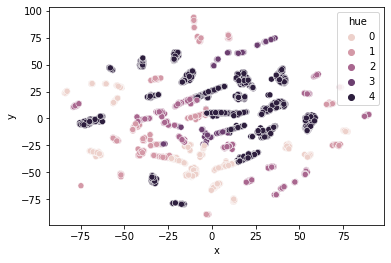

In [261]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)

# Hocus Pocus

## LDA 

In [263]:
#read in Hocus Pocus csv
HocusPocus = pd.read_csv('HocusPocus.csv')
HocusPocus.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [266]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in HocusPocus['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [267]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [268]:
#adding to Hocus Pocus dataframe 

#lemmatized tweets list version
HocusPocus['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in HocusPocus['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

HocusPocus['string_lemmatized'] = lemmatized_tweets_str_lst

HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[warlocktriqz, hocus, pocus, halloween, town, ...",warlocktriqz hocus pocus halloween town nightm...
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994,"[hocus, pocus, chill, fall, edition, lmao, jus...",hocus pocus chill fall edition lmao justkiddin...
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260,"[tried, reaaallllyyyy, hard, watch, october, w...",tried reaaallllyyyy hard watch october wait ho...
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[hocus, pocus, chill]",hocus pocus chill
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bravobag, carlton, eye, newt, chalice, dumble...",bravobag carlton eye newt chalice dumbledore d...


In [269]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(HocusPocus['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00a,00pm,00s,01482,01cxk29vzb,02,02nbak11r6,0402,...,zv6buo922v,zvan5afsq5,zvustfvuhm,zvwejhk6tv,zwbzqkv82e,zwraxlatep,zx34oqllj3,zxpnxqda2z,zy5vw0ik6p,zywf3p9uhm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(HocusPocus['lemmatize'])

In [271]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in HocusPocus['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [272]:
#running LDA model for Hocus Pocus
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.120*"hocus" + 0.120*"pocus" + 0.020*"chill" + 0.011*"halloweentown" + 0.011*"disney" + 0.010*"halloween" + 0.008*"movie" + 0.006*"wait" + 0.005*"watch" + 0.005*"netflix"
Topic 1 
Words: 0.102*"pocus" + 0.102*"hocus" + 0.029*"watch" + 0.012*"halloween" + 0.012*"hocuspocus" + 0.010*"like" + 0.009*"want" + 0.007*"love" + 0.007*"show" + 0.007*"wanna"
Topic 2 
Words: 0.079*"hocus" + 0.079*"pocus" + 0.031*"halloween" + 0.022*"watch" + 0.020*"movie" + 0.019*"hocuspocus" + 0.016*"never" + 0.012*"gt" + 0.011*"october" + 0.010*"seen"
Topic 3 
Words: 0.098*"hocus" + 0.097*"pocus" + 0.022*"watching" + 0.020*"halloween" + 0.018*"movie" + 0.018*"time" + 0.009*"fall" + 0.007*"hocuspocus" + 0.007*"favorite" + 0.007*"first"
Topic 4 
Words: 0.044*"hocus" + 0.044*"pocus" + 0.034*"put" + 0.031*"spell" + 0.027*"well" + 0.023*"remember" + 0.021*"hocuspocus" + 0.009*"sister" + 0.008*"sanderson" + 0.007*"halloween"


In [273]:
# Display model for Hocus Pocus
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.051371  0.033495       1        1  27.836581
0      0.045585  0.090237       2        1  25.333305
3      0.037693  0.000084       3        1  20.545256
2      0.046258 -0.124300       4        1  18.382972
4     -0.180907  0.000483       5        1   7.901886, topic_info=          Term        Freq       Total Category  logprob  loglift
121        put  127.000000  127.000000  Default  30.0000  30.0000
122      spell  114.000000  114.000000  Default  29.0000  29.0000
9        chill  244.000000  244.000000  Default  28.0000  28.0000
968       well  101.000000  101.000000  Default  27.0000  27.0000
1539  remember   84.000000   84.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
170      first    8.797097   81.184038   Topic5  -6.0016   0.3158
38       photo    6.537976   28.371805   Topic5  -6.2984   1.0703
127     disney    9.809980  147.523427   Topic5  -5.8926  -0.1725
58    watching    9.319572  325.647933   Topic5  -5.9439  -1.0156
838      would    7.046010   49.537715   Topic5  -6.2236   0.5878

[336 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
91        1  0.120821        1
91        2  0.120821        1
91        3  0.327943        1
91        4  0.189862        1
91        5  0.258902        1
...     ...       ...      ...
390       4  0.162196      yet
615       1  0.314888  youtube
615       2  0.645521  youtube
615       3  0.015744  youtube
615       5  0.031489  youtube

[624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

## TSNE

In [ ]:
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [276]:
hm = np.array(X)
hm

array([[0.33482763, 0.01692926, 0.61445445, 0.01690289, 0.01688574],
       [0.9097401 , 0.02265934, 0.02249362, 0.02280308, 0.02230388],
       [0.0224806 , 0.02253412, 0.9101391 , 0.02245816, 0.02238799],
       ...,
       [0.4034658 , 0.5209821 , 0.02518965, 0.02523354, 0.02512887],
       [0.21258865, 0.01872107, 0.01857711, 0.73186994, 0.01824327],
       [0.24552986, 0.6680071 , 0.02883008, 0.02888928, 0.02874365]],
      dtype=float32)

In [ ]:
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(hm)
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = hm.argmax(axis=1)

In [ ]:
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)